<a href="https://colab.research.google.com/github/SaptarshiSen-1/KNN-algorithm-in-Iris-Dataset/blob/main/KNN_algorithm_in_Iris_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



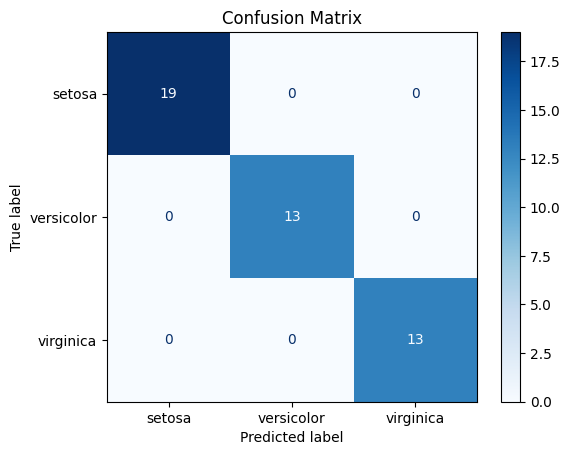

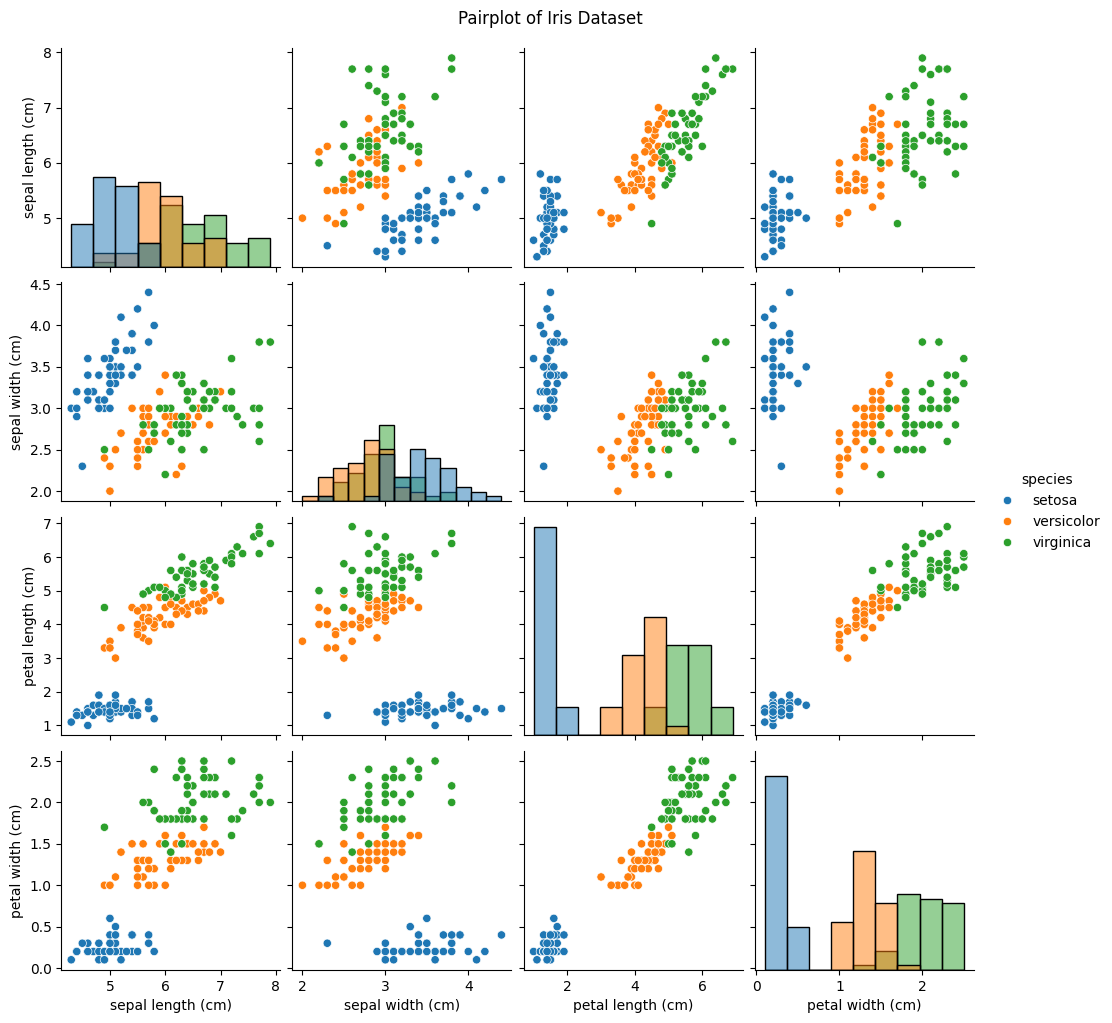

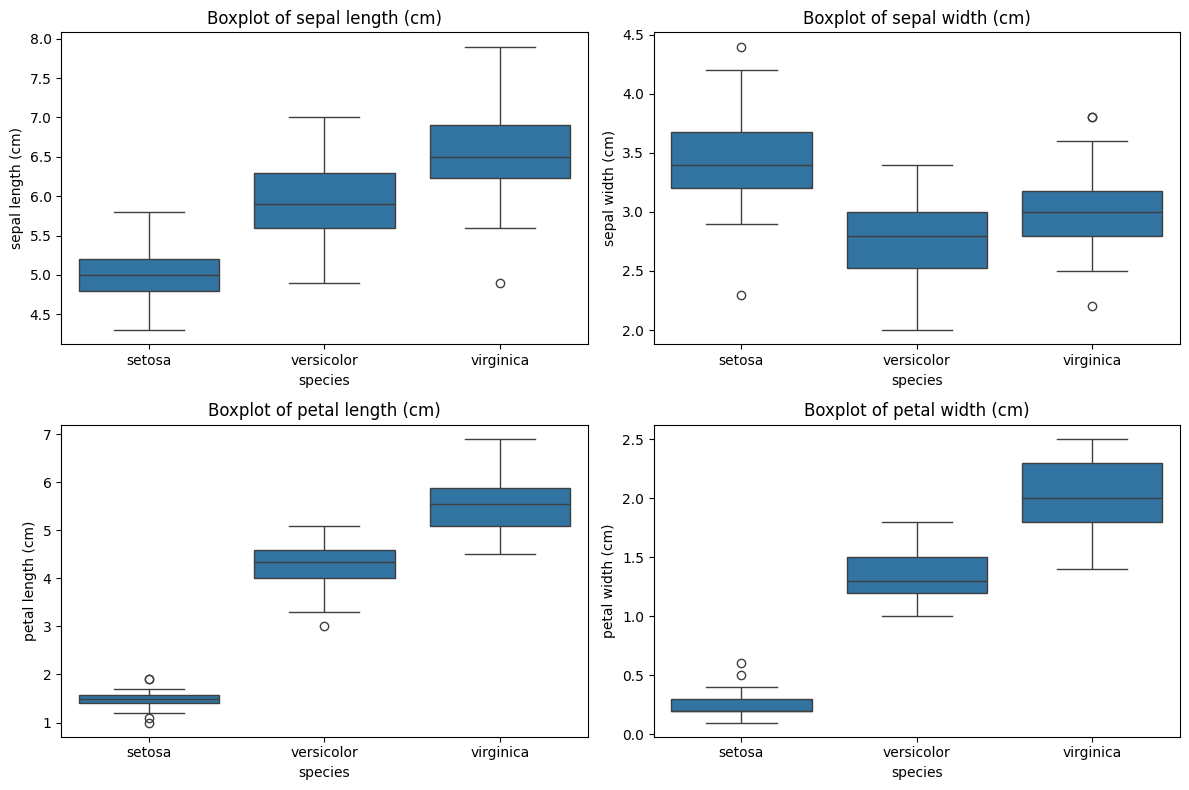

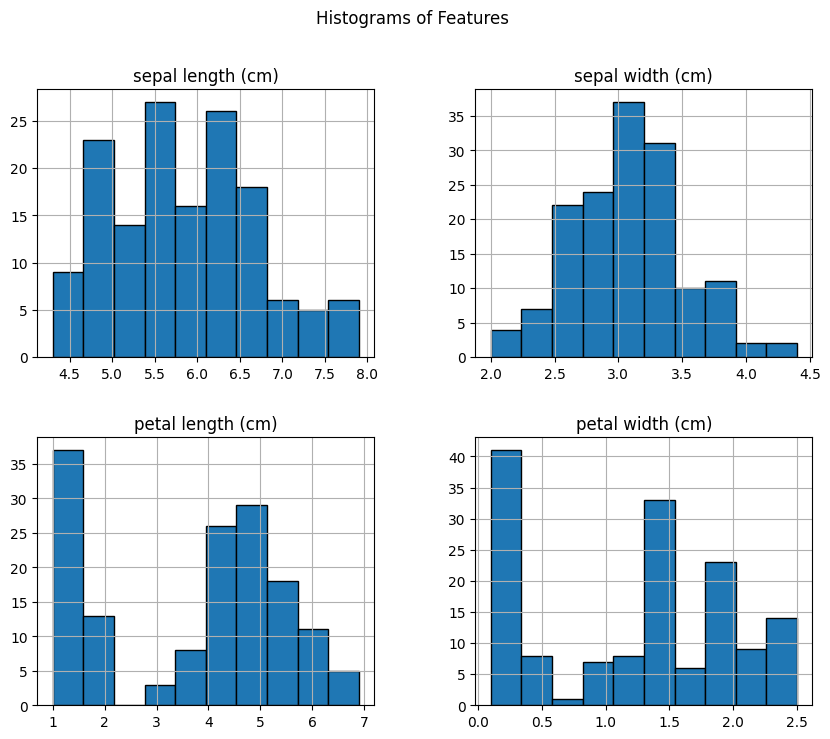

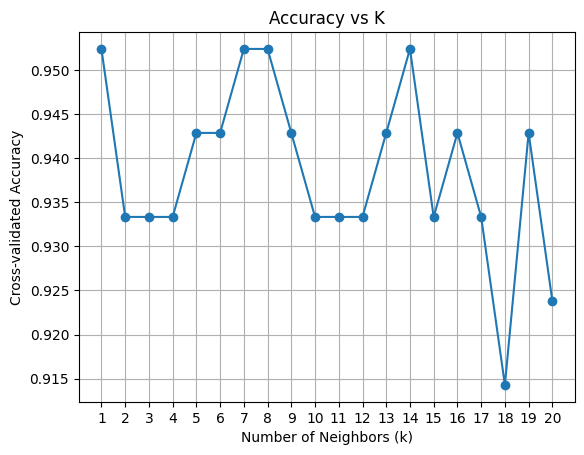

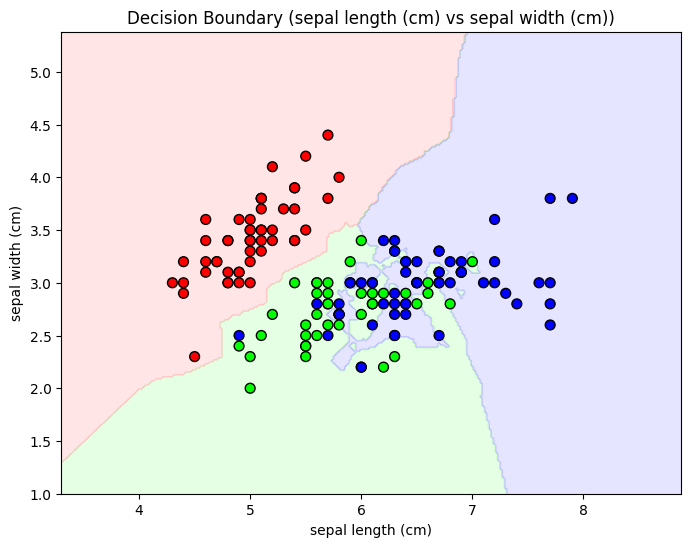

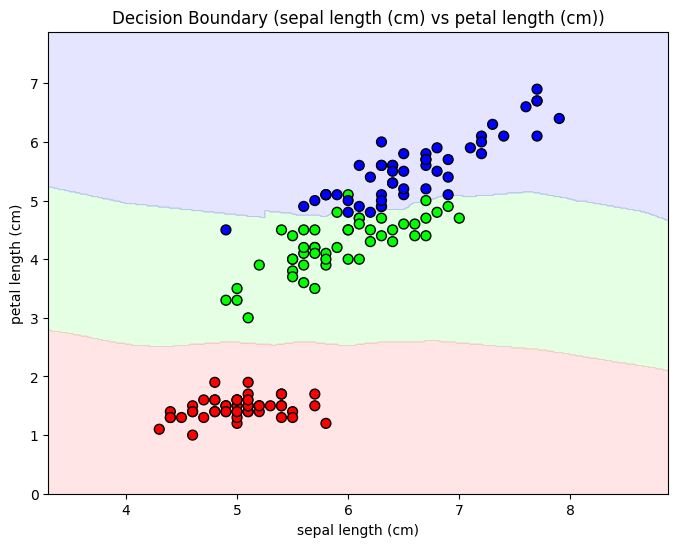

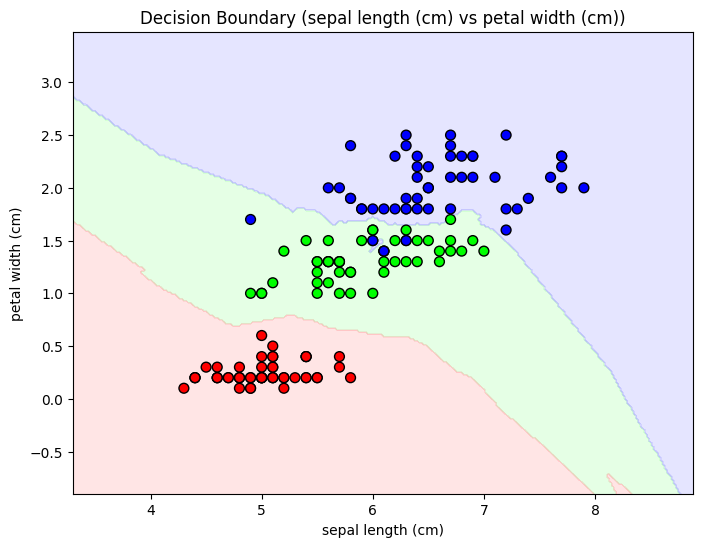

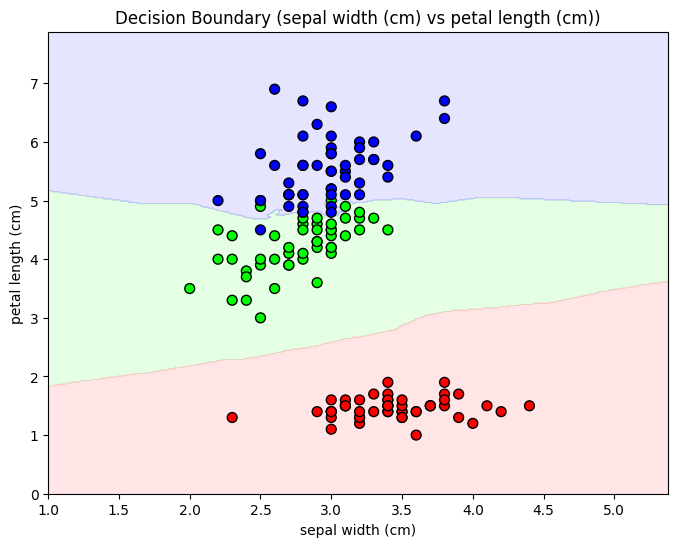

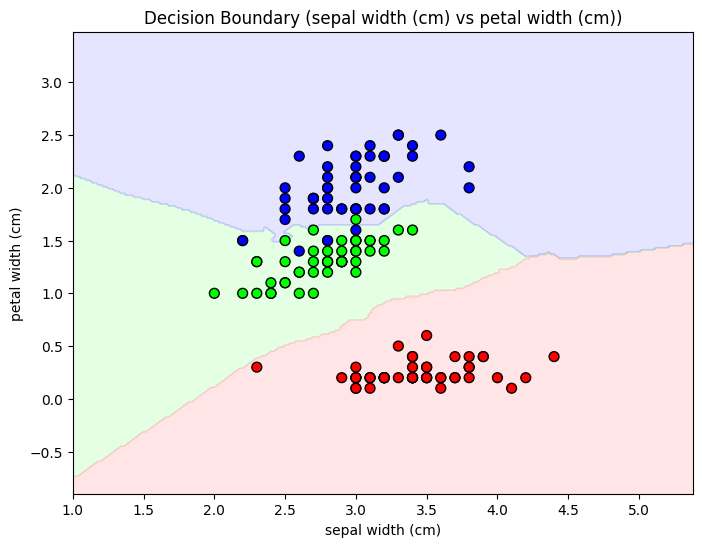

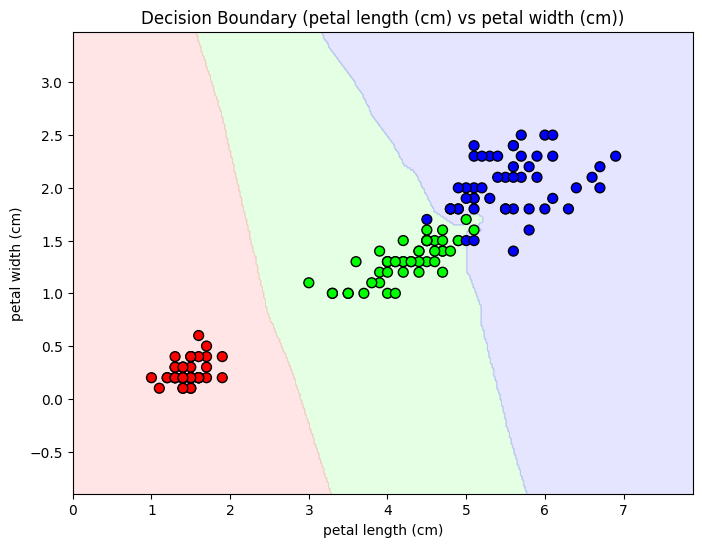

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Convert to DataFrame for easier plotting
df = pd.DataFrame(X, columns=feature_names)
df['species'] = pd.Categorical.from_codes(y, target_names)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)

# Print accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Pairplot of all features
sns.pairplot(df, hue="species", diag_kind="hist")
plt.suptitle("Pairplot of Iris Dataset", y=1.02)
plt.show()

# Boxplots for each feature
plt.figure(figsize=(12, 8))
for i, col in enumerate(feature_names):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='species', y=col, data=df)
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

# Histograms for each feature
df.hist(edgecolor='black', figsize=(10, 8))
plt.suptitle("Histograms of Features")
plt.show()

# Accuracy vs K values
k_values = range(1, 21)
accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5)
    accuracies.append(scores.mean())

plt.plot(k_values, accuracies, marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Cross-validated Accuracy")
plt.title("Accuracy vs K")
plt.xticks(k_values)
plt.grid()
plt.show()

# Decision boundaries for pairs of features
from matplotlib.colors import ListedColormap

def plot_decision_boundaries(X, y, features, classifier, h=0.02):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=50)
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.title(f"Decision Boundary ({features[0]} vs {features[1]})")
    plt.show()

# Plot for all pairs of features
from itertools import combinations
for feature_indices in combinations(range(4), 2):
    i, j = feature_indices
    X_pair = X[:, [i, j]]
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_pair, y)
    plot_decision_boundaries(X_pair, y, [feature_names[i], feature_names[j]], knn)
